In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly

In [2]:
data= pd.read_csv('1718hourlyPrice_withZEC.csv')
data['time'] = pd.to_datetime(data['time'])
ws = 48 # window size
coins = ['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'XMR', 'NEO', 'MIOTA', 'DASH', 'ETC', 'ZEC']
BBW = dict()
BBW['time'] = data.iloc[(np.arange(data.shape[0] - ws) + ws),0]
for coin in coins:
    price = data[coin]
    ws = 48 
    BBW_48h = []
    for i in range(len(price) - ws):
        window = price.iloc[i:(i+ws)]
        ma = window.mean()
        sd = window.std()

        upper = ma + sd * 2
        lower = ma - sd * 2
        middle = ma
        BBW_48h.append(((upper - lower) / middle))
    BBW[coin] = BBW_48h

# 'BTC','ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'XMR', 'NEO', 'MIOTA', 'DASH', 'ETC', 'ZEC'
mktShare = [0.43635329, 0.15890567, 0.07639468, 0.05976894, 0.02171618,
               0.0123417 , 0.00957971, 0.01225733, 0.01285381, 0.01213426,
               0.0060474 , 0.00282648]

BBW = pd.DataFrame(BBW)
BBW['weighted BBW'] = BBW.iloc[:,1:] @ mktShare


data

,time,BTC,ETH,XRP,BCH,LTC,EOS,XMR,NEO,MIOTA,DASH,ETC,ZEC
0,2017-11-01 00:00:00,6419.55,303.205,0.19835,435.505,55.435,0.77170,87.155,28.355,0.38890,275.900,10.475,231.980
1,2017-11-01 01:00:00,6390.05,302.960,0.19820,438.900,55.255,0.76765,86.870,28.160,0.38610,275.955,10.475,231.040
2,2017-11-01 02:00:00,6410.95,303.300,0.19820,441.895,55.225,0.79215,86.940,27.930,0.38620,276.875,10.495,230.340
3,2017-11-01 03:00:00,6418.80,302.950,0.19770,443.895,55.230,0.80855,86.780,27.785,0.38555,276.820,10.495,229.650
4,2017-11-01 04:00:00,6384.80,302.555,0.19750,448.565,55.160,0.78870,86.885,27.820,0.38375,277.545,10.480,228.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,2018-04-30 20:00:00,9301.05,675.585,0.84155,1385.700,150.220,17.85500,251.610,84.765,1.99400,478.710,22.090,289.695
4341,2018-04-30 21:00:00,9251.80,671.290,0.83245,1362.450,149.270,17.27500,246.970,83.405,1.97750,476.515,21.885,287.790
4342,2018-04-30 22:00:00,9207.35,667.650,0.82490,1340.900,148.420,17.03500,241.730,82.795,1.95800,474.200,21.465,284.810
4343,2018-04-30 23:00:00,9214.85,667.670,0.82665,1341.500,147.975,17.22000,240.755,83.495,1.95350,472.360,21.520,284.810


In [4]:
# fig = go.Figure()
# for bbw in BBW.columns[1:]:
#     fig.add_trace(go.Scatter(x=BBW['time'], y=BBW[bbw], name = bbw))

# fig.update_layout(title="Bollinger Bands Width")

# plotly.offline.plot(fig,filename="Bollinger Bands Width.html")

'Bollinger Bands Width.html'

In [24]:
BBW.to_csv('BBW.csv', index = False)

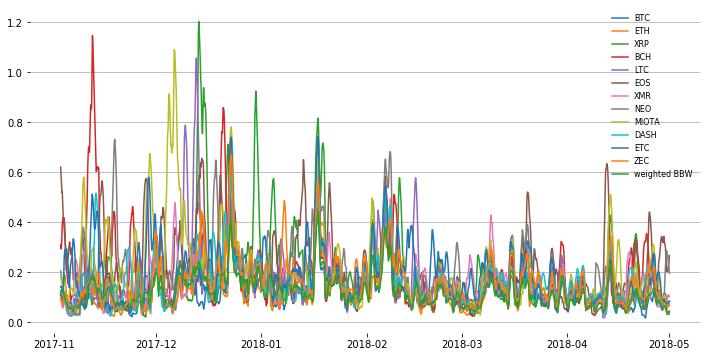

In [14]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
for bbw in BBW.columns[1:]:
    
    plt.plot(BBW.set_index(BBW.time)[bbw], label = bbw)
plt.grid(axis='y')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.savefig('Bollinger Bands WidthwoL',transparent=True)